In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
# let's see what are the first 5 labels
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Flattening the 2d array 

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

The classes in the Cifar dataset


In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## define a function to plot an image and the respective label

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

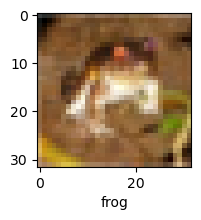

In [10]:
plot_sample(X_train, y_train, 0)

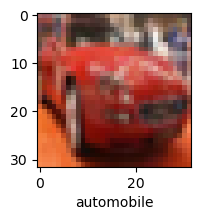

In [11]:
plot_sample(X_train, y_train, 5)

## Normalizing the images in range 0-1

In [12]:
X_train =X_train/255.0
X_test =X_test/255.0

# Building an Artificial Neural Network for the classification of the objects in this dataset

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.3069 - loss: 1.9290
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.4205 - loss: 1.6482
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.4486 - loss: 1.5590
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4768 - loss: 1.4844
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.4910 - loss: 1.4472
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.5087 - loss: 1.3915
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.5231 - loss: 1.3555
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.5392 - loss: 1.3142
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.5461 - loss: 1.2862
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.5559 - loss: 1.2601


### Summary of model

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.26      0.39      1000
           1       0.71      0.56      0.63      1000
           2       0.51      0.14      0.22      1000
           3       0.44      0.15      0.22      1000
           4       0.46      0.42      0.44      1000
           5       0.28      0.71      0.40      1000
           6       0.52      0.63      0.57      1000
           7       0.76      0.38      0.51      1000
           8       0.41      0.83      0.55      1000
           9       0.56      0.59      0.58      1000

    accuracy                           0.47     10000
   macro avg       0.54      0.47      0.45     10000
weighted avg       0.54      0.47      0.45     10000



### Now, let's build a Convolutional Neural Network

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.3938 - loss: 1.6803
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6087 - loss: 1.1218
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6550 - loss: 0.9896
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.6880 - loss: 0.8955
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7154 - loss: 0.8232
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.7346 - loss: 0.7653
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7542 - loss: 0.7080
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7670 - loss: 0.6701
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7807 - loss: 0.6227
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7934 - loss: 0.5922


In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6907 - loss: 0.9213


[0.9293203353881836, 0.6922000050544739]

#### The accuracy has improved by using CNN

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[3.3594103e-04, 3.0723790e-04, 2.6647738e-04, 8.2898283e-01,
        2.8594324e-04, 9.9460222e-02, 4.3287221e-03, 4.6050269e-04,
        6.5277748e-02, 2.9437541e-04],
       [7.4222783e-04, 2.3061144e-01, 1.9353231e-05, 7.2356038e-06,
        2.2841300e-08, 1.6227374e-07, 1.6576696e-09, 3.9580339e-09,
        7.4840456e-01, 2.0215007e-02],
       [8.4929354e-02, 2.4649751e-01, 3.4751594e-03, 4.9914103e-02,
        4.3306719e-03, 7.2043375e-03, 1.2201364e-03, 3.2743402e-03,
        5.6880540e-01, 3.0349044e-02],
       [9.2037028e-01, 1.8103430e-02, 4.6620215e-03, 2.7921380e-04,
        2.3872168e-03, 3.0489895e-05, 1.7786169e-04, 1.1582375e-05,
        5.3439561e-02, 5.3830596e-04],
       [1.6392704e-06, 2.9921525e-06, 1.0388166e-03, 4.1333918e-02,
        8.7407756e-01, 1.1348496e-02, 7.2110750e-02, 3.3655204e-05,
        5.1306899e-05, 8.4092238e-07]], dtype=float32)

In [20]:
# first 5 predictions
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [21]:
#actual labels
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

our model predicted 3/5 objects correctly


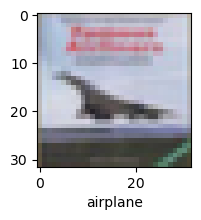

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
#our prediction
classes[y_classes[3]]

'airplane'